In [237]:
%set_env WRIGHT_ENDPOINT=http://54.89.254.148:8080
%run setup.py

env: WRIGHT_ENDPOINT=http://54.89.254.148:8080


In [239]:
df = %dpsql select model from testglue.dpe2e.car_data where price>1000000
# df = %dpsql select * from sys.metrics.statements
display(df)

(rows, columns): (9, 1) | Execution Time: 8.625 seconds


,model
0,Rapid
1,GLC
2,Kushiq
3,A4
4,Q7
5,Creta
6,Thar
7,i20
8,Scorpio


In [240]:
virt_df = %dpsql select * from sys.metrics.statements
display(virt_df)

(rows, columns): (2, 5) | Execution Time: 2.263 seconds


,CONNECTION_ID,STATEMENT_ID,STATEMENT_TEXT,STATEMENT_PLAN,STATEMENT_STATS
0,2108cb5e-4997-4b48-a20d-160cd0057037,0,<SQL_TEXT>,<SQL_PLAN>,"{""action_id"":""b86069eb-6e58-4c15-904c-fefbad26..."
1,4d1d5b03-4f20-4582-8758-c35e3b3dc015,0,<SQL_TEXT>,<SQL_PLAN>,"{""action_id"":""3e138cc0-a178-4f25-a668-e9a9eebb..."


In [241]:
virt_df["STATEMENT_STATS"][0]

'{"action_id":"b86069eb-6e58-4c15-904c-fefbad26723b","graph_id":"adf3e35c-172b-4775-b91a-4320bd82d219","summary":{"graph":{"version":"0.7.3","connection":null,"statement":null,"strategy":"9749b696-fee7-4c10-8a85-9bf3f765c233","action":"b86069eb-6e58-4c15-904c-fefbad26723b","id":"adf3e35c-172b-4775-b91a-4320bd82d219","description":null,"target":null,"items":[{"Node":{"id":"0a7d0d0e-8300-4a33-b3b6-2d8978004094","description":null,"kind":{"Input":{"location":{"S3":{"access_key":"REDACTED","secret_key":"REDACTED","bucket":"dpe2e","prefixes":["demo/car_data/"]}},"schema":{"options":[{"Format":"Parquet"}],"view":{"ordered":false,"partial":false,"nocase":false,"fields":[{"name":"country","unused":true,"optional":true,"repeated":false,"partitioned":false,"type":{"Primitive":"ldstring(4)"}},{"name":"company","unused":true,"optional":true,"repeated":false,"partitioned":false,"type":{"Primitive":"ldstring(4)"}},{"name":"model","unused":false,"optional":true,"repeated":false,"partitioned":false,"t

In [271]:
import json
jsonStr = virt_df["STATEMENT_STATS"][0]
# df2 = pd.read_json(jsonStr, orient='index')

data = json.loads(jsonStr)
graph_data = data["summary"]["graph"]["items"]
# graph_data = data["summary"]["graph"]

# graph_data
connectivity_df = pd.json_normalize(graph_data)
connectivity_df

,Node.id,Node.description,Node.kind.Input.location.S3.access_key,Node.kind.Input.location.S3.secret_key,Node.kind.Input.location.S3.bucket,Node.kind.Input.location.S3.prefixes,Node.kind.Input.schema.options,Node.kind.Input.schema.view.ordered,Node.kind.Input.schema.view.partial,Node.kind.Input.schema.view.nocase,Node.kind.Input.schema.view.fields,Node.kind.Input.target,Edge.id,Edge.alias,Edge.description,Edge.source.node_id,Edge.source.out_port,Edge.destinations,Edge.type,Edge.space,Edge.queue_size,Node.kind.Compute.setup,Node.kind.Compute.body,Node.kind.Compute.cleanup,Node.kind.Compute.target,Node.kind.Output.schema.options,Node.kind.Output.schema.view.ordered,Node.kind.Output.schema.view.partial,Node.kind.Output.schema.view.nocase,Node.kind.Output.schema.view.fields,Node.kind.Output.target,Node.kind.Output.location.Cache.address,Node.kind.Output.location.Cache.key,Node.kind.Output.location.Cache.cache_type
0,0a7d0d0e-8300-4a33-b3b6-2d8978004094,None,REDACTED,REDACTED,dpe2e,[demo/car_data/],[{'Format': 'Parquet'}],False,False,False,"[{'name': 'country', 'unused': True, 'optional...",SoftPdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c97d802e-9181-45a4-9fa9-19734e81ed03,model,NaN,0a7d0d0e-8300-4a33-b3b6-2d8978004094,2.0,[{'node_id': '28469a98-4aff-42b2-804f-681aae9a...,ldstring(4),Host,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d1e5a50d-001e-4593-9c61-6a03237c2cc0,price,NaN,0a7d0d0e-8300-4a33-b3b6-2d8978004094,5.0,[{'node_id': '2bd73034-eabf-47f5-a7f8-0f6fd66b...,les64,Host,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2bd73034-eabf-47f5-a7f8-0f6fd66b998b,Filter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[done],"[B0: eos.any r9, i0, compare r9, r0, branch.if...",[done],SoftPdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60458c72-829c-474c-93ba-c7559adf755c,"coalesce((price > 1000000),0)",NaN,2bd73034-eabf-47f5-a7f8-0f6fd66b998b,0.0,[{'node_id': '28469a98-4aff-42b2-804f-681aae9a...,lelebits(1),Host,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28469a98-4aff-42b2-804f-681aae9a0e0b,Filter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[done],"[B0: eos.any r9, i2,i5,i7, compare r9, r0, bra...",[done],SoftPdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ac1911c9-a4ae-4b3f-907a-04d36a100c2e,model,NaN,28469a98-4aff-42b2-804f-681aae9a0e0b,2.0,[{'node_id': 'fa752bc7-f057-42ef-8c87-cc7a568b...,ldstring(4),Host,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0e37d356-480b-45bf-b85b-c34cc1ecc30b,price,NaN,28469a98-4aff-42b2-804f-681aae9a0e0b,5.0,[{'node_id': 'f32cefd2-e6a4-49b3-9579-7f2d8f17...,les64,Host,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,f32cefd2-e6a4-49b3-9579-7f2d8f175029,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'Format': 'Identity'}],False,False,False,[],SoftPdu,NaN,NaN,NaN
9,fa752bc7-f057-42ef-8c87-cc7a568be2e2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[{'Format': 'Identity'}],False,False,False,"[{'name': '', 'unused': False, 'optional': Fal...",SoftPdu,NaN,b23a07bc-0567-47ac-ad4d-e3aeddf5cc2a,Result


In [275]:
summary_df = pd.json_normalize(data["summary"]["graph_summary"])
summary_df

,kind,id,lifetime,input_stall,output_stall,edge_summary.n_block.kind,edge_summary.n_block.help,edge_summary.n_block.value,edge_summary.n_row.kind,edge_summary.n_row.help,edge_summary.n_row.value,edge_summary.n_byte.kind,edge_summary.n_byte.help,edge_summary.n_byte.value,edge_summary.time.kind,edge_summary.time.help,edge_summary.time.value,node_summary
0,edge,c97d802e-9181-45a4-9fa9-19734e81ed03,"[1677819685107433, 1677819686803639]",1696181,[7],count_u64,Number of data blocks forwarded,1.0,count_u64,Number of rows forwarded,13.0,count_u64,Number of bytes forwarded,109.0,count_u64,Time taken in to finish in us,1696206.0,NaN
1,edge,d1e5a50d-001e-4593-9c61-6a03237c2cc0,"[1677819685108363, 1677819686803687]",1695280,"[15, 10]",count_u64,Number of data blocks forwarded,1.0,count_u64,Number of rows forwarded,13.0,count_u64,Number of bytes forwarded,104.0,count_u64,Time taken in to finish in us,1695324.0,NaN
2,edge,60458c72-829c-474c-93ba-c7559adf755c,"[1677819685107445, 1677819686815229]",1707755,[15],count_u64,Number of data blocks forwarded,1.0,count_u64,Number of rows forwarded,13.0,count_u64,Number of bytes forwarded,2.0,count_u64,Time taken in to finish in us,1707784.0,NaN
3,edge,ac1911c9-a4ae-4b3f-907a-04d36a100c2e,"[1677819685108359, 1677819686818416]",1710037,[5],count_u64,Number of data blocks forwarded,1.0,count_u64,Number of rows forwarded,9.0,count_u64,Number of bytes forwarded,73.0,count_u64,Time taken in to finish in us,1710057.0,NaN
4,edge,0e37d356-480b-45bf-b85b-c34cc1ecc30b,"[1677819685108355, 1677819686818434]",1710043,[16],count_u64,Number of data blocks forwarded,1.0,count_u64,Number of rows forwarded,9.0,count_u64,Number of bytes forwarded,72.0,count_u64,Time taken in to finish in us,1710079.0,NaN
5,node,28469a98-4aff-42b2-804f-681aae9a0e0b,"[1677819685108230, 1677819686818089]","[0, 0, 1694644, 0, 0, 227, 0, 11593, 0, 0, 0, ...","[0, 0, 24, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'fpga_mover': [{'latency': 17, 'copied': 0, ..."
6,node,f32cefd2-e6a4-49b3-9579-7f2d8f175029,"[1677819685107524, 1677819686818530]",[0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
7,node,fa752bc7-f057-42ef-8c87-cc7a568be2e2,"[1677819685108336, 1677819686847083]",[0],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
8,node,2bd73034-eabf-47f5-a7f8-0f6fd66b998b,"[1677819685108085, 1677819686814962]","[1694975, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'fpga_vector': [{'units_processed': 13, 'num..."
9,node,0a7d0d0e-8300-4a33-b3b6-2d8978004094,"[1677819685107587, 1677819686803624]",NaN,"[0, 0, 0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [120]:
# !pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.0 MB/s eta 0:00:00


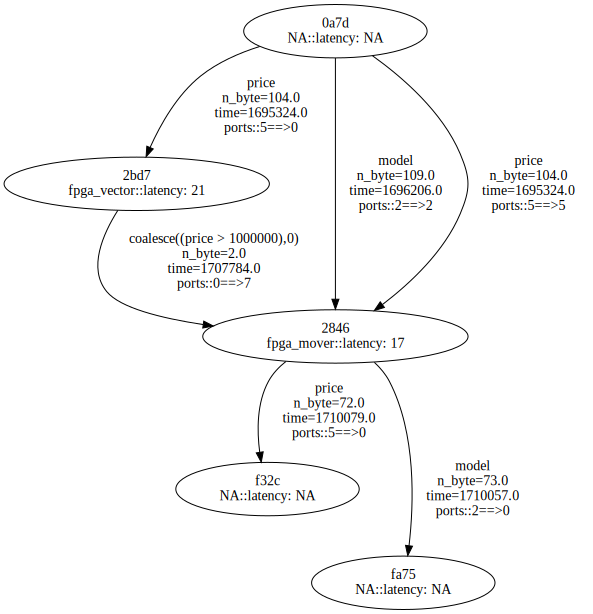

In [452]:
#### NEW ######
import graphviz

f.attr(size='50,50')
f = graphviz.Digraph('DFG', filename='dfg2.gv')

# create nodes
for nd in connectivity_df["Node.id"]:
    axl = "NA"
    latency = "NA"
    if not pd.isna(nd):
        node_summary_obj = summary_df.query('id=="{}"'.format(nd))["node_summary"]
        idz = node_summary_obj.index[0]
        node_summary = node_summary_obj[idz]
        if node_summary:
            keys, values = zip(*node_summary[0].items())
            axl = keys[0]
            latency = str(values[0][0]["latency"])
        node_label = nd[:4] + "\n" + axl + "::latency: " + latency
        f.node(nd, node_label)

# Create edges and connect the nodes
for idx, edge in enumerate(connectivity_df["Edge.id"]):
    if not pd.isna(edge):
        src_node = connectivity_df["Edge.source.node_id"][idx]
        src_port = connectivity_df["Edge.source.out_port"][idx]
        dst_list = connectivity_df["Edge.destinations"][idx]
        edge_alias = connectivity_df["Edge.alias"][idx]
        
        for dst in dst_list:
            n_byte_obj = summary_df.query('id=="{}"'.format(edge))["edge_summary.n_byte.value"]
            time_obj = summary_df.query('id=="{}"'.format(edge))["edge_summary.time.value"]
            idy = n_byte_obj.index[0]
            n_byte = n_byte_obj.name.split(".")[1] + "=" + str(n_byte_obj[idy])
            time = time_obj.name.split(".")[1] + "=" + str(time_obj[idy])
            edge_label = edge_alias + "\n" + n_byte + "\n"+time + "\n" + \
                         "ports::"+str(src_port).split(".")[0]+"==>"+str(dst["in_port"]).split(".")[0]
#             print(src_node, dst["node_id"])
            f.edge(src_node, dst["node_id"], label=edge_label)      
f.unflatten(stagger=2) 


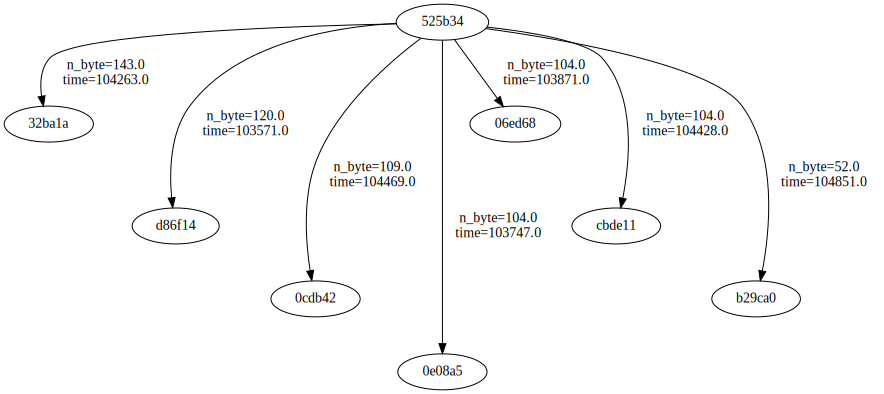

In [235]:
###### OLD #######
import graphviz

f.attr(rankdir='asdf', size='50,50')
f = graphviz.Digraph('DFG', filename='dfg.gv')
for src, dst_list, edge in zip(connectivity_df["source_id"], 
                          connectivity_df["destination_id"], 
                          connectivity_df["edge_id"]):
    for dst in dst_list:
        # Edge params
#         row_df = summary_df.loc[summary_df['id'] == edge]
        n_byte_obj = summary_df.query('id=="{}"'.format(edge))["summary.n_byte.value"]
        time_obj = summary_df.query('id=="{}"'.format(edge))["summary.time.value"]
        idx = n_byte_obj.index[0]
        n_byte = n_byte_obj.name.split(".")[1] + "=" + str(n_byte_obj[idx])
        time = time_obj.name.split(".")[1] + "=" + str(time_obj[idx])
        lbl = n_byte+"\n"+time

        f.edge(src[:6], dst[:6], label=lbl)
        
f.unflatten(stagger=4)  